<a href="https://colab.research.google.com/github/SURAJ0JAAT/GOOGLE-PLAY-STORE-ANALYSIS/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import important library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#bring in the six packs
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Play Store App Review Analysis/Play Store Data.csv')

df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Play Store App Review Analysis/User Reviews.csv')

In [5]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [7]:
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [8]:
df1.info(),df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


(None, (64295, 5))

In [9]:
# using merge function by setting how='outer'
data = pd.merge(df1, df2, 
                  on='App',
                   how='outer')



In [10]:
data.columns.nunique()

17

# 1. `Cleaning Data`#

Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis.

```

Category


In [11]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'FAMILY', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'COMICS',
       'DATING', 'TOOLS', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS',
       'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'MEDICAL',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME',
       'SPORTS', 'VIDEO_PLAYERS', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING',
       'WEATHER', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9', nan],
      dtype=object)

In [12]:
data['Category'].nunique()

34

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [13]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
131611,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,NaN,NaN,NaN


In [14]:
data.loc[131611] = data.loc[131611].shift()
data['App'].loc[131611] = data['Category'].loc[131611]
data['Category'].loc[131611] = np.nan
data.loc[131611]

App                       Life Made WI-Fi Touchscreen Photo Frame
Category                                                      NaN
Rating                                                        1.9
Reviews                                                      19.0
Size                                                         3.0M
Installs                                                   1,000+
Type                                                         Free
Price                                                           0
Content Rating                                           Everyone
Genres                                                        NaN
Last Updated                                    February 11, 2018
Current Ver                                                1.0.19
Android Ver                                            4.0 and up
Translated_Review                                             NaN
Sentiment                                                     NaN
Sentiment_

#Rating

In [15]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

###Data type of Rating is object. If we convert from string to numeric, we can make easy.

In [16]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

##Reviews

In [17]:
data['Reviews'].unique()

array(['159', '967', '974', ..., '1195', '398307', nan], dtype=object)

In [18]:
data[data['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [19]:
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

#Size

In [20]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.


In [22]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
data['Size'] = data.Size.str.replace("M","000") # All size values became the kilobyte type.
data['Size'] = data.Size.str.replace("k","")
data['Size'] = data.Size.replace("1,000+",1000)
data['Size'] =data['Size'].astype(float)
data['Size'].dtype

dtype('float64')

#Installs


In [23]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', nan], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [24]:
data['Installs'] = data.Installs.str.replace(",","")
data['Installs'] = data.Installs.str.replace("+","")
data['Installs'] = data.Installs.replace("Free",np.nan)
data['Installs'] = data['Installs'].astype(float)
data['Installs'].dtype

dtype('float64')

##Price

In [21]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04', nan], dtype=object)

###Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [ ]:
data['Price'] = data.Price.replace("Everyone",np.nan)
data['Price'] = data.Price.str.replace("$","").astype(float)
data['Price'].dtype

dtype('float64')

#Last Updated

In [ ]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'February 16, 2014', 'March 23, 2014', nan], dtype=object)

In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0        2018-01-07
1        2018-01-15
2        2018-01-15
3        2018-01-15
4        2018-01-15
            ...    
134705          NaT
134706          NaT
134707          NaT
134708          NaT
134709          NaT
Name: Last Updated, Length: 134710, dtype: datetime64[ns]

#Exploratory Data Analysis
After, I prepared to analyze our data, somewhat let's explore the datas. :)

corr() : It returns correlation.
describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.

In [ ]:
data.corr()

,Rating,Reviews,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.145220,-0.040509,0.052010,0.057025
Reviews,0.145220,1.000000,-0.014316,-0.107372,-0.017990
Price,-0.040509,-0.014316,1.000000,0.028082,0.007664
Sentiment_Polarity,0.052010,-0.107372,0.028082,1.000000,0.229363
Sentiment_Subjectivity,0.057025,-0.017990,0.007664,0.229363,1.000000


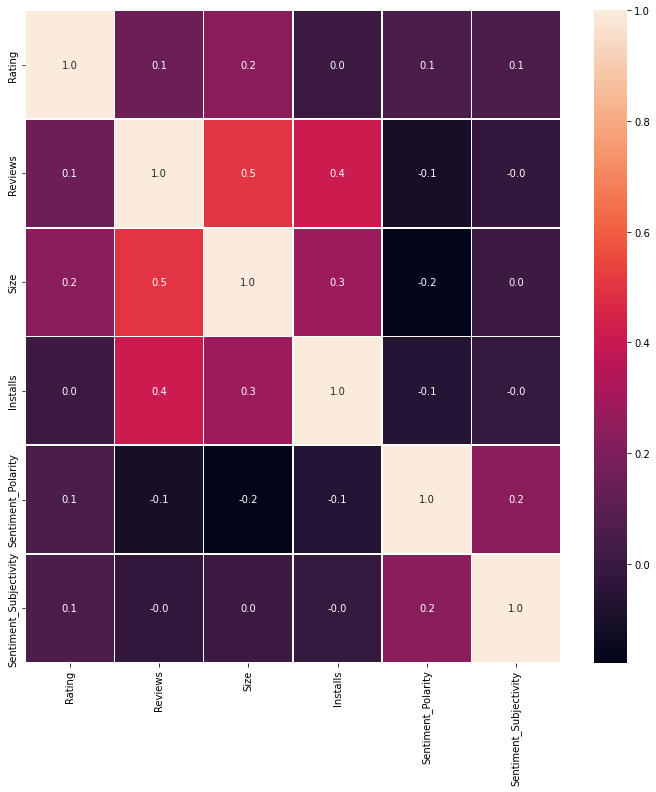

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [27]:
data.describe()

,Rating,Reviews,Size,Installs,Sentiment_Polarity,Sentiment_Subjectivity
count,130458.000000,1.319710e+05,83565.000000,1.319710e+05,74113.000000,74113.000000
mean,4.313394,2.108052e+06,32059.876288,6.860319e+07,0.158436,0.493650
std,0.308711,6.155251e+06,28628.557038,1.843520e+08,0.333733,0.241525
min,1.000000,0.000000e+00,1.000000,0.000000e+00,-1.000000,0.000000
25%,4.200000,1.987000e+04,10000.000000,1.000000e+06,0.000000,0.377273
50%,4.400000,1.366260e+05,24000.000000,1.000000e+07,0.130000,0.509091
75%,4.500000,1.480189e+06,52000.000000,5.000000e+07,0.358333,0.633333
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,1.000000,1.000000


#Category and Reviews

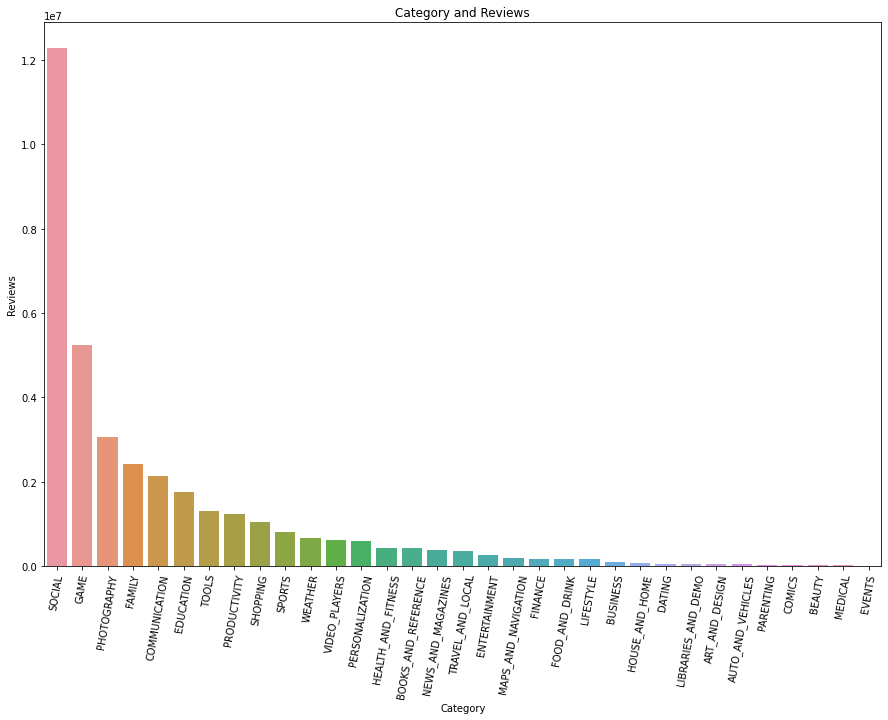

In [28]:
category_list = list(data['Category'].unique())
category_review = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

#Category and Installs

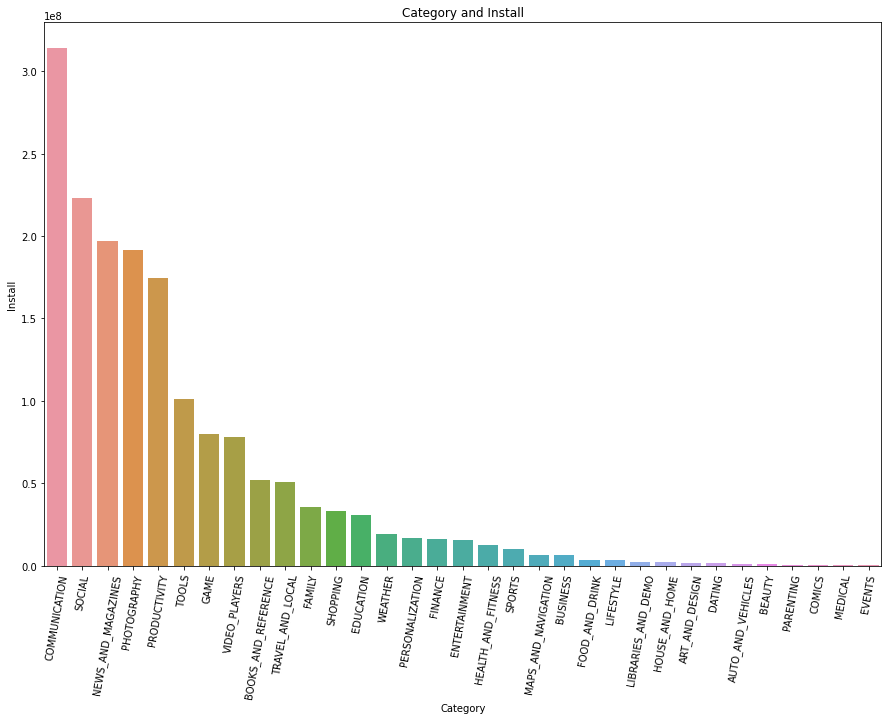

In [29]:
category_list = list(data['Category'].unique())
category_install = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

#Content Rating

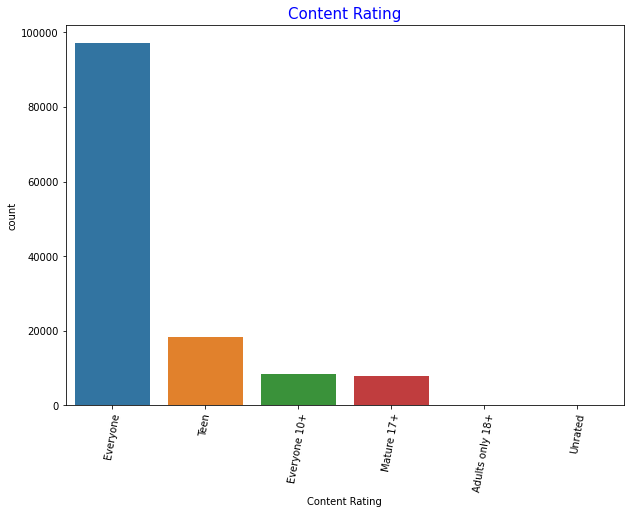

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()